# Scaling
- 범위(Scale)가 다른 변수의 범위(Scale)를 비슷하게 맞추기 위한 목적

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1. 실습데이터

### 1) seaborn 'mpg' Data Set

In [2]:
import seaborn as sns

DF = sns.load_dataset('mpg')

- 자동차 연비데이터
  - mpg : miles per gallon
  - 1 mile : 1.6 km
  - 1 gallon : 3.78 liter

In [3]:
DF.info() # horsepower에 결측치 있음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
DF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


- X, y Data

In [5]:
X = DF[['weight']]
y = DF['mpg']

# train_test_split 필요

# test data 스케일링을 할 때도 train data의 min, max를 써줘야 한다
# train, test split 해줬을 때에는 fit 과 transform을 분리해서 사용해야 한다

### 2) Without Scaling
- X값 확인

In [6]:
X[:5]

,weight
0,3504
1,3693
2,3436
3,3433
4,3449


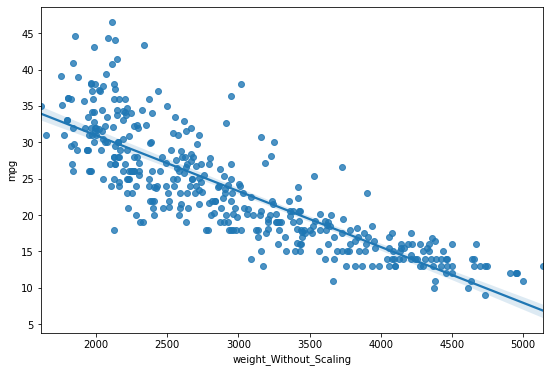

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (9, 6))
sns.regplot(x = X, y = y)
plt.xlabel('weight_Without_Scaling')
plt.show()

### 3) With Normalization
- sklearn Package

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
X_Norm = scaler1.fit_transform(X)

- 정규화된 X값 확인

In [9]:
X_Norm[:5]

array([[0.5361497 ],
       [0.58973632],
       [0.51686986],
       [0.51601928],
       [0.52055571]])

- 정규화된 X값 모델 생성

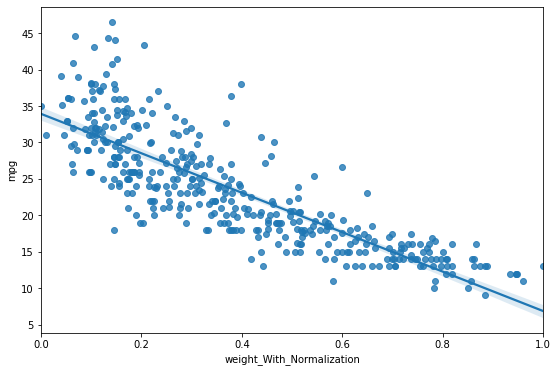

In [12]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = X_Norm, y = y)
plt.xlabel('weight_With_Normalization')
plt.show()

### 4) With Standardization
- sklearn Package

In [13]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
X_Stan = scaler2.fit_transform(X)

- 표준화된 X값 확인

In [14]:
X_Stan[:5]

array([[0.63086987],
       [0.85433297],
       [0.55047045],
       [0.54692342],
       [0.56584093]])

- 표준화된 X값 모델 생성

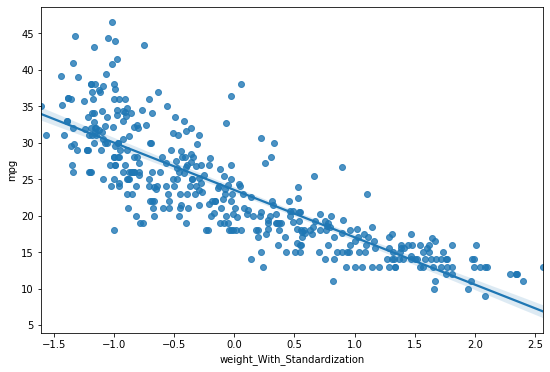

In [15]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = X_Stan, y = y)
plt.xlabel('weight_With_Standardization')
plt.show()